# Recipes Bot

In [17]:
import os
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

## 1 - Téléchargement du dataset "Fruits 360"

In [3]:
!git clone https://github.com/Horea94/Fruit-Images-Dataset

Cloning into 'Fruit-Images-Dataset'...
remote: Enumerating objects: 385858, done.
remote: Counting objects: 100% (8693/8693), done.
remote: Compressing objects: 100% (8659/8659), done.
remote: Total 385858 (delta 37), reused 8688 (delta 34), pack-reused 377165
Receiving objects: 100% (385858/385858), 2.10 GiB | 13.95 MiB/s, done.
Resolving deltas: 100% (1197/1197), done.
Updating files: 100% (90503/90503), done.


In [4]:
%cd "./Fruit-Images-Dataset"
%ls

/content/Fruit-Images-Dataset
LICENSE  papers/  readme.md  src/  Test/  test-multiple_fruits/  Training/


In [5]:
train_dir = "./Training/"
test_dir = "./Test/"

In [43]:
images_train = []
images_test = []
labels_train = []
labels_test = []

for label_train in os.listdir(train_dir):
  label_dir = train_dir+label_train+"/"
  for image_file in os.listdir(label_dir):
    labels_train.append(label_train)
    images_train.append(np.array(Image.open(label_dir+image_file).convert("RGB")))

for label_test in os.listdir(test_dir):
  label_dir = test_dir+label_test+"/"
  for image_file in os.listdir(label_dir):
    labels_test.append(label_test)
    images_test.append(np.array(Image.open(label_dir+image_file).convert("RGB")))

In [47]:
print("Train / Taille dataset d'images: ", np.array(images_train).shape)
print("Train / Taille labels: ", len(labels_train), "\n")
print("Test / Taille dataset d'images: ", np.array(images_test).shape)
print("Test / Taille labels: ", len(labels_test))

Train / Taille dataset d'images:  (67692, 100, 100, 3)
Train / Taille labels:  67692 

Test / Taille dataset d'images:  (22688, 100, 100, 3)
Test / Taille labels:  22688


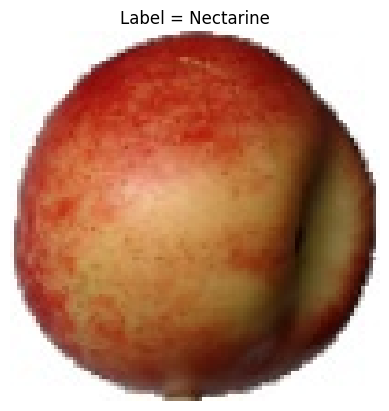

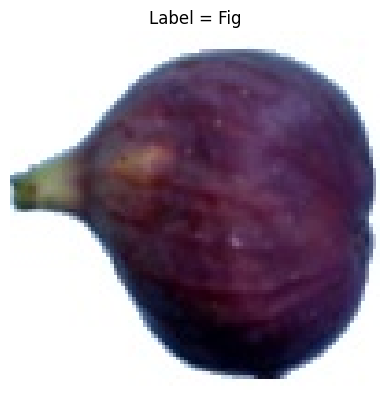

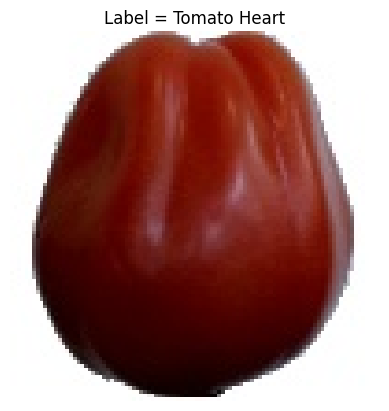

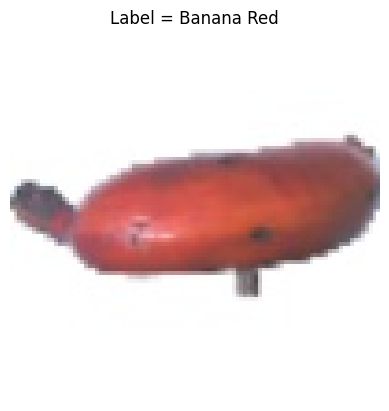

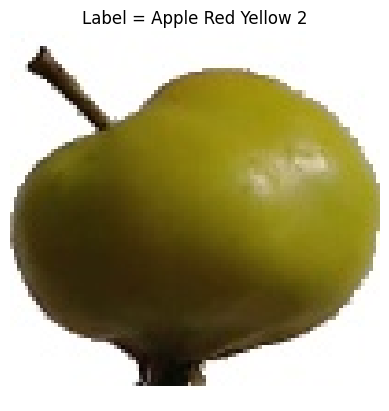

In [48]:
# Affichage 5 images random du dataset de train avec leurs labels
for i in range(5):
  index = np.random.randint(low=0, high=len(labels_train))
  image = images_train[index]
  label = labels_train[index]
  plt.title("Label = " + label)
  plt.imshow(image)
  plt.axis("off")
  plt.show()